In [1]:
from helpers.shared_imports import *
%matplotlib inline

In [41]:
from helpers.traj import get_trajectory, get_trajectory_regularised
from helpers.vis import trajectory_plot, trajectory_plot_compare, trajectory_animate

**Check AMPL and SNOPT binaries are in system path**

The following should not give an error.

In [34]:
from amplpy import AMPL

AMPL()

In [23]:
ampl_qoc_path = 'ampl/bebop_power.mod' # quadratic optimal control
ampl_toc_path = 'ampl/bebop_time.mod'  # time optimal control

In [20]:
# arbitrary initial conditions
params = {'x0'     : 10.0,
          'z0'     : 10.0,
          'vx0'    : 1.0,
          'vz0'    : 1.0,
          'theta0' : 0.1}

**Run optimiser for quadratic optimal control (QOC)**

In [21]:
hide_solver_output = True # set True to view ampl solver output
qoc_out = get_trajectory(params, ampl_qoc_path, hide_solver_output)

optimal_sol_found, traj_arr, objective = qoc_out

print('Optimal solution found:', optimal_sol_found)
if optimal_sol_found:
    print('Objective: {0:.3f}'.format(objective))

Optimal solution found: True
Objective: 52.623


**Plot optimised trajectory**

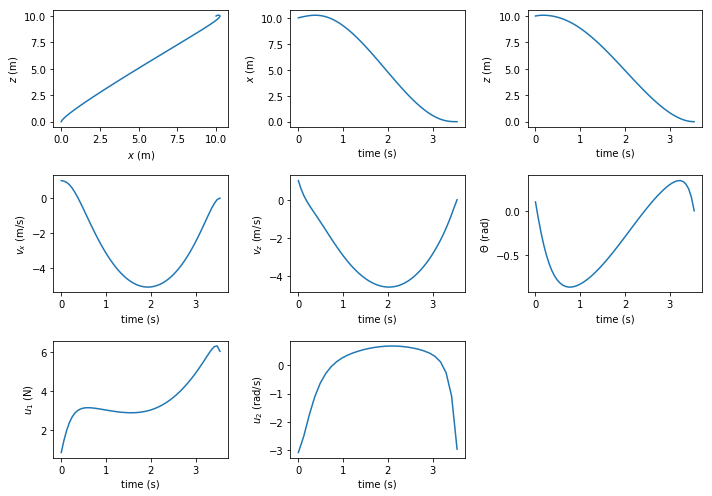

In [29]:
_, traj_arr, _ = qoc_out
trajectory_plot(traj_arr)
plt.show()

**Now optimise for time optimal control (TOC)**

In [35]:
toc_out = get_trajectory(params, ampl_toc_path)

optimal_sol_found, traj_arr, objective = toc_out

print('Optimal solution found:', optimal_sol_found)
if optimal_sol_found:
    print('Objective: {0:.3f}'.format(objective))

Optimal solution found: True
Objective: 2.905


**Plot TOC trajectory and we observe chattering**

This is a common occurence when solving OCPs for which the control profile is bang-bang using a direct method.

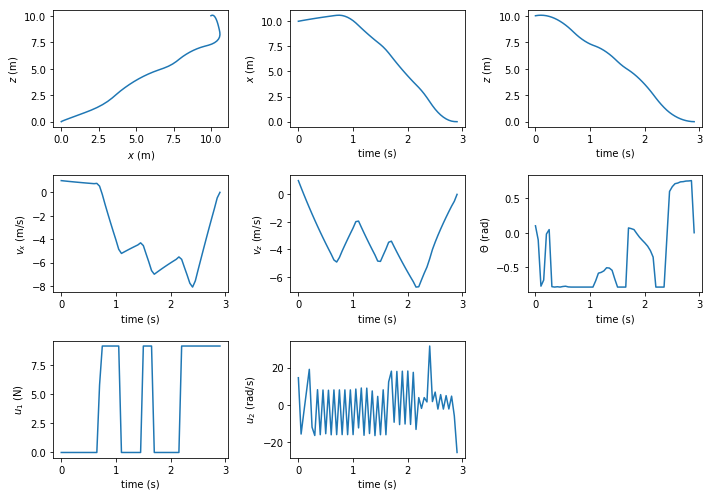

In [36]:
_, traj_arr, _ = toc_out
trajectory_plot(traj_arr)
plt.show()

**Overcome chattering by regularising time-optimal objective**

Function `get_trajectory_regularised` solves for unregularised OCP first (i.e. J = T) and then from this solution solves for regularised OCP.

Switching the objective between regularised and unregularised is handled by the ampl variable `reg`.

For details on the regularisation, see paper by Dharmesh Tailor, Dario Izzo (available soon).

In [37]:
toc_reg_out = get_trajectory_regularised(params, ampl_toc_path)

optimal_sol_found, traj_arr, objective = toc_reg_out

print('Optimal solution found:', optimal_sol_found)
if optimal_sol_found:
    print('Objective: {0:.3f}'.format(objective))

Optimal solution found: True
Objective: 3.237


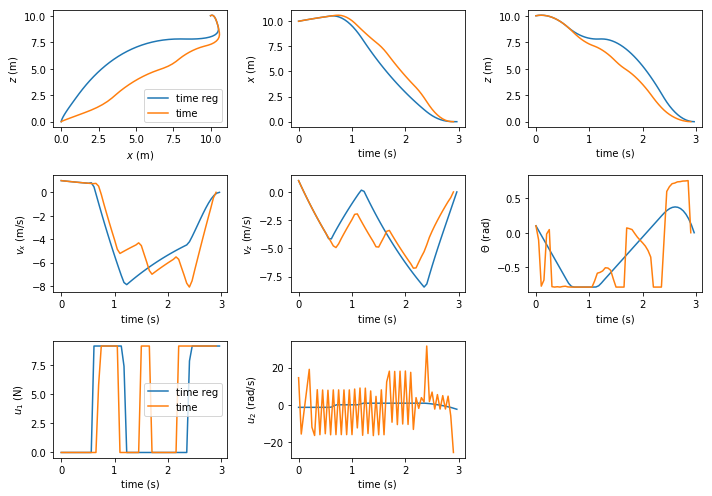

In [39]:
_, traj_toc, _ = toc_out
_, traj_reg_toc, _ = toc_reg_out

trajectory_plot_compare(traj_toc, traj_reg_toc, 'time', 'time reg')
plt.show()

**Plot QOC and TOC (regularised) together**

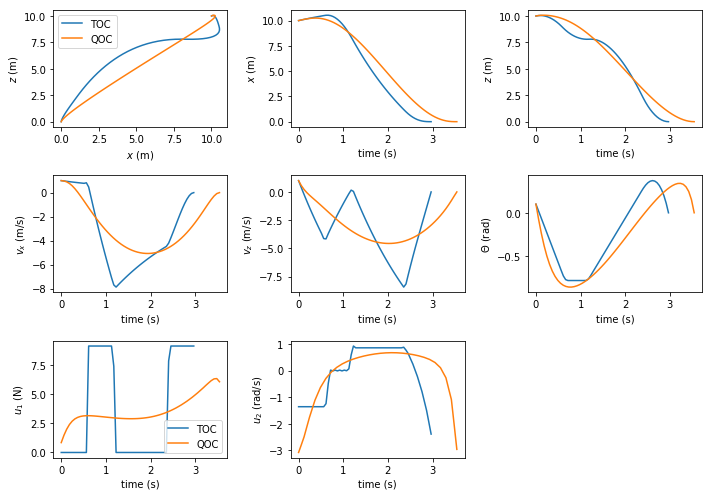

In [40]:
_, traj_qoc, _ = qoc_out
_, traj_toc, _ = toc_reg_out

trajectory_plot_compare(traj_qoc, traj_toc, 'QOC', 'TOC')
plt.show()

**Animation of trajectory**

<IPython.core.display.Javascript object>


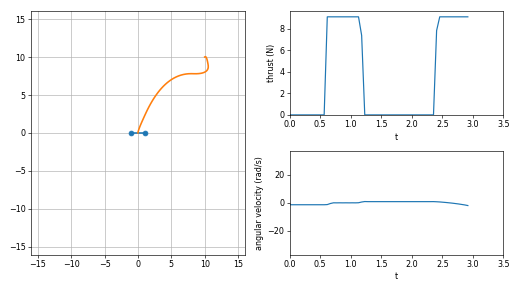

In [44]:
%matplotlib notebook

_, traj_toc, _ = toc_reg_out

trajectory_animate(traj_toc)